In [1]:
import pandas, numpy, math, seaborn
import scipy, scipy.stats

In [2]:
# module for figures
import matplotlib, matplotlib.pyplot as plt

# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

# 0. user-defined variables

In [3]:
input_file_directory = '/home/adrian/projects/ATG7/data/'

normal_tissue_expression_file = '/home/adrian/projects/ATG7/results/normal_tissue_expression.tsv'
primary_tumor_expression_file = '/home/adrian/projects/ATG7/results/primary_tumors_expression.tsv'

## functions & options


In [4]:
#define a function to split after the ".". The 1 is for how many word to have. if we have several dot. The [1] is what is after the dot, and [0] what is before
def split(L):
  return L.split(".",1)[0]

# II] Dataframe settings

## A) Isoform data

In [5]:
# Original data isoforms
directory = input_file_directory + "xena_surv_ATG7.tsv"
df_ori= pandas.read_csv(directory, sep = "\t")


In [6]:
# Column selection
df= df_ori[['sample',
            '_sample_type',
            '_primary_site',
            'ENSG00000197548.12',
            'ENST00000354449.7', 
            'ENST00000354956.9',
            'ENST00000446450.6']]

# We have Adrenal Gland and Adrenal gland. I need to put "G".
df['_primary_site'] = df['_primary_site'].str.title()

# Column rename
df.rename(columns = {'sample' : 'sample',
    '_sample_type' : 'Sample_Type', 
                            '_primary_site' : 'Primary_Site', 
                            'ENST00000354449.7': 'ATG7_1',
                            'ENST00000354956.9': 'ATG7_2',
                            'ENST00000446450.6': 'ATG7_3',
                            'ENSG00000197548.12': 'ATG7'}, inplace = True)

# Calcul to have value from log2;  2**(ATG7(1))-0.001
df["ATG7(total)"] = pow(2,df['ATG7'])-0.001
df["ATG7(1)"] = pow(2,df['ATG7_1'])-0.001
df["ATG7(2)"] = pow(2,df['ATG7_2'])-0.001
df["ATG7(3)"] = pow(2,df['ATG7_3'])-0.001

# Calcul to have log2+1 from value; 
df["log2_+1_ATG7(total)"] = numpy.log2(df['ATG7(total)']+1)
df["log2_+1_ATG7(1)"] = numpy.log2(df['ATG7(1)']+1)
df["log2_+1_ATG7(2)"] = numpy.log2(df['ATG7(2)']+1)

# Calcul to see percentage of expression of the 3 isoforms of ATG7
df['ATG7_prot_tot'] = (df['ATG7(1)'] + df['ATG7(2)'] + df['ATG7(3)'])
df['ATG7_1%'] = (df['ATG7(1)'] *100)/ df['ATG7_prot_tot']
df['ATG7_2%'] = (df['ATG7(2)'] *100)/ df['ATG7_prot_tot']
df['ATG7_3%'] = (df['ATG7(3)'] *100)/ df['ATG7_prot_tot']

#Add columns, normalized on total
df["ATG7(1)norm"] = df['ATG7(1)']/df["ATG7(total)"]
df["ATG7(2)norm"] = df['ATG7(2)']/df["ATG7(total)"]
df.head()

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/adrian/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,sample,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7(total),ATG7(1),ATG7(2),ATG7(3),log2_+1_ATG7(total),log2_+1_ATG7(1),log2_+1_ATG7(2),ATG7_prot_tot,ATG7_1%,ATG7_2%,ATG7_3%,ATG7(1)norm,ATG7(2)norm
0,TARGET-20-PARUBT-40,Recurrent Blood Derived Cancer - Peripheral Blood,White Blood Cell,4.401,1.3900,1.522,-1.7320,21.125765,2.619787,2.870889,3.000343e-01,4.467655,1.855905,1.952665,5.790710,45.241201,49.577495,5.181305,0.124009,0.135895
1,TARGET-20-PATJHJ-40,Recurrent Blood Derived Cancer - Peripheral Blood,White Blood Cell,2.820,1.1180,-1.086,-9.9660,7.060624,2.169459,0.470066,-1.495113e-07,3.010892,1.664236,0.555881,2.639524,82.191280,17.808726,-0.000006,0.307262,0.066576
2,TARGET-10-PASLZM-40,Recurrent Blood Derived Cancer - Peripheral Blood,White Blood Cell,1.158,0.0158,-3.171,-3.8160,2.230479,1.010012,0.110028,7.000183e-02,1.691748,1.007204,0.150597,1.190042,84.871949,9.245753,5.882299,0.452823,0.049329
3,TARGET-21-PATAIJ-42,Post treatment Blood Cancer - Blood,White Blood Cell,4.332,1.3450,1.975,-9.9660,20.139115,2.539302,3.930282,-1.495113e-07,4.401843,1.823465,2.301670,6.469584,39.249848,60.750154,-0.000002,0.126088,0.195157
4,TARGET-21-PASVJS-41,Post treatment Blood Cancer - Bone Marrow,White Blood Cell,5.156,1.8040,3.769,0.5069,35.653197,3.490870,13.631706,1.419994e+00,5.195867,2.166995,3.871026,18.542569,18.826249,73.515731,7.658019,0.097912,0.382342


In [7]:
df['Sample_Type'].value_counts()

Primary Tumor                                        9185
Normal Tissue                                        7429
Solid Tissue Normal                                   738
Cell Line                                             433
Metastatic                                            393
Primary Solid Tumor                                   286
Primary Blood Derived Cancer - Peripheral Blood       239
Primary Blood Derived Cancer - Bone Marrow            237
Recurrent Blood Derived Cancer - Bone Marrow          104
Recurrent Tumor                                        45
Recurrent Solid Tumor                                  13
Post treatment Blood Cancer - Bone Marrow              12
Additional - New Primary                               11
Recurrent Blood Derived Cancer - Peripheral Blood       3
Post treatment Blood Cancer - Blood                     1
Control Analyte                                         1
Additional Metastatic                                   1
Name: Sample_T

In [8]:
#Creation of two tables, Normal tissue and Primary tumor.
df_ATG7_Normal = df[df['Sample_Type'].str.match ('Normal Tissue')]
df_ATG7_Primary = df[df['Sample_Type'].str.match ('Primary Tumor')]

print('normal_tissue' , len(df_ATG7_Normal))
print('primary_tumors' , len(df_ATG7_Primary))

normal_tissue 7429
primary_tumors 9185


In [9]:
# df with only Normal and Primary 
df_Norm_Prim = pandas.concat([df_ATG7_Normal, df_ATG7_Primary], axis=0)
df_Norm_Prim.reset_index(drop=True, inplace=True)

### High/Low expression per Median for Isoform expression

In [10]:
# What is the median for iso 1 and iso 2?
#High >50% and low <50%

In [11]:
Data = [[df_ATG7_Normal, 'Normal'], [df_ATG7_Primary, 'Primary']]
isoforms = [["ATG7_1", "iso1"], ["ATG7_2", "iso2"]]

df_LoHi = [] 

for df in Data:
  for isoform in isoforms:
    xMed = df[0][isoform[0]].median()

    low = df[0].loc[df[0][isoform[0]] < xMed]
    low['L/H'] = "Low_"+isoform[1]

    high = df[0].loc[df[0][isoform[0]] > xMed]
    high['L/H'] = "High_"+isoform[1]

  #merge low and high
  concat = pandas.concat([low, high], axis=0)
  col = concat.pop('L/H')
  concat.insert(3, 'L/H', col)
  df_LoHi.append(concat)

normal_LoHi = df_LoHi[0]
primary_LoHi = df_LoHi[1]

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## B) Whole gene expression

In [12]:
#Import list of protein coding transcripts
protein_coding_directory = input_file_directory + "protein_coding_list.txt"
protein_coding_list= pandas.read_csv(protein_coding_directory, sep = "\t")
print(len(protein_coding_list))
protein_coding_list.head(2)

22796


,ensembl_gene_id,hgnc_symbol,entrezgene_id,transcript_biotype
1,ENSG00000198888,MT-ND1,4535.0,protein_coding
2,ENSG00000198763,MT-ND2,4536.0,protein_coding


In [13]:
%%time

df_gexpr_normal= pandas.read_csv(normal_tissue_expression_file, sep = "\t")
df_gexpr_primary= pandas.read_csv(primary_tumor_expression_file, sep = "\t")

CPU times: user 2min 31s, sys: 3.62 s, total: 2min 35s
Wall time: 2min 35s


In [14]:
#Preparation protein coding gene expression
#remove dot in ENSEMBL name. Function split created at the beginning
data = [df_gexpr_normal, df_gexpr_primary]

df_protcoding_exp = []
for df in data: 
  #remove dot in ens name
  df["sample"] = df["sample"].apply(split)
  #see if have duplicate
  # print(df.duplicated(subset=['sample']).sum())

  #Merge with prot coding list
  df.rename(columns = {'sample' : 'ensembl_gene_id'}, inplace = True)
  dfmerged = protein_coding_list.merge(df)
  df_protcoding_exp.append(dfmerged)

  #control merge is correct
  # print("control merge is correct")
  # print(df.loc[df['ensembl_gene_id'] == 'ENSG00000198712'])
  # print(dfmerged.loc[dfmerged['ensembl_gene_id'] == 'ENSG00000198712'])

normal_protcoding = df_protcoding_exp[0]
primary_protcoding = df_protcoding_exp[1]

In [15]:
%%time

#Preparation of the global dataframe
data = [[normal_protcoding, df_ATG7_Normal], [primary_protcoding, df_ATG7_Primary]]

df_final = []

for df in data:
  
  #transpose the table 
  curr_df = df[0].copy()
  curr_df = numpy.transpose(curr_df)

  #Change head column & delete the name of the column index; choose ENSEMBL
  curr_df.columns = curr_df.iloc[0]
  curr_df.columns.name = None
  curr_df = curr_df.reset_index()

  #Delete the first rows & columns rename to merge
  curr_df = curr_df.drop(curr_df.index[0:4])
  curr_df.rename(columns = {'index' : 'sample'}, inplace = True)
  
  #Merge the two df to have isoform expression + whole gene expression 
  df_merged = pandas.merge(df[1], curr_df, on= 'sample')

  print('df_isoform is: ', len(df_Norm_Prim))
  print('df_gene_exp is: ', len(df))
  print('df_merged: ', len(df_merged))

  #delete the sample column and select column
  df_merged = df_merged.drop("sample", 1)
  df_merged = df_merged.drop(df_merged.columns[5:19], axis=1)
  
  #save in list
  df_final.append(df_merged)


df_normal_expr = df_final[0]
df_primary_expr = df_final[1]

df_isoform is:  16614
df_gene_exp is:  2
df_merged:  7429


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


df_isoform is:  16614
df_gene_exp is:  2
df_merged:  9185
CPU times: user 2min 9s, sys: 12.5 s, total: 2min 22s
Wall time: 2min 21s


In [16]:
df_normal_expr.head()

,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ENSG00000198888,ENSG00000198763,ENSG00000198804,ENSG00000198712,ENSG00000228253,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
0,Normal Tissue,Muscle,5.042,3.860,2.390,14.0639,13.9595,13.8503,14.4453,15.0971,...,2.7868,5.6494,5.0193,2.694,4.5274,5.0998,2.3423,6.079,6.4861,4.97
1,Normal Tissue,Muscle,4.252,2.322,1.956,13.9265,13.5455,15.2642,14.3855,15.1867,...,9.3501,6.1104,6.057,1.177,6.8792,6.4325,2.1013,6.7035,1.1706,1.3167
2,Normal Tissue,Muscle,3.909,2.602,1.345,14.2878,14.1511,14.3722,13.8211,14.8161,...,9.0646,5.975,5.1173,1.8683,4.6136,5.009,2.0604,5.7848,1.7489,4.6514
3,Normal Tissue,Muscle,3.854,2.568,1.428,13.8853,14.2716,15.1167,14.0622,15.5897,...,9.2252,5.4941,5.588,-0.4521,5.6631,6.3797,2.5683,7.3214,1.614,1.5563
4,Normal Tissue,Muscle,3.822,2.164,1.293,12.9986,13.757,14.4661,13.4082,14.0564,...,8.9779,6.1502,5.133,2.0289,6.8202,6.1789,1.8524,6.7685,2.8838,1.8323


# III] ATG7 expression

##A) Distribution


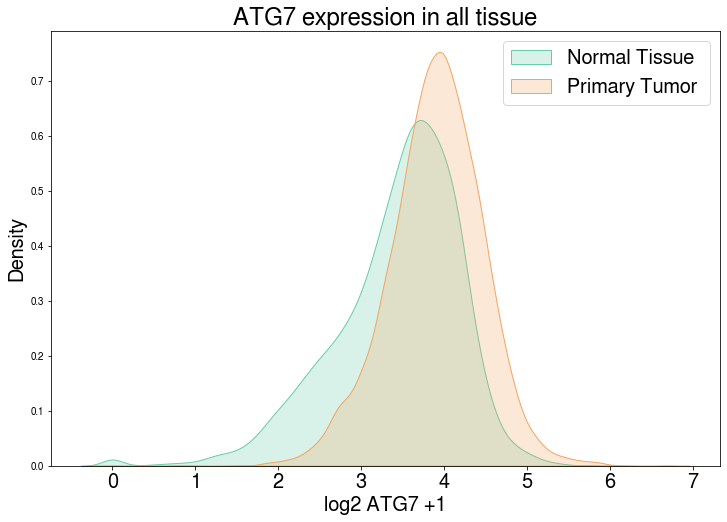

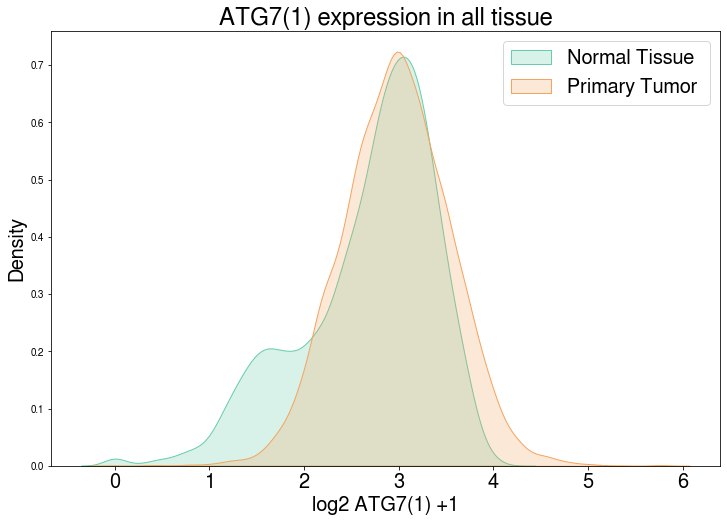

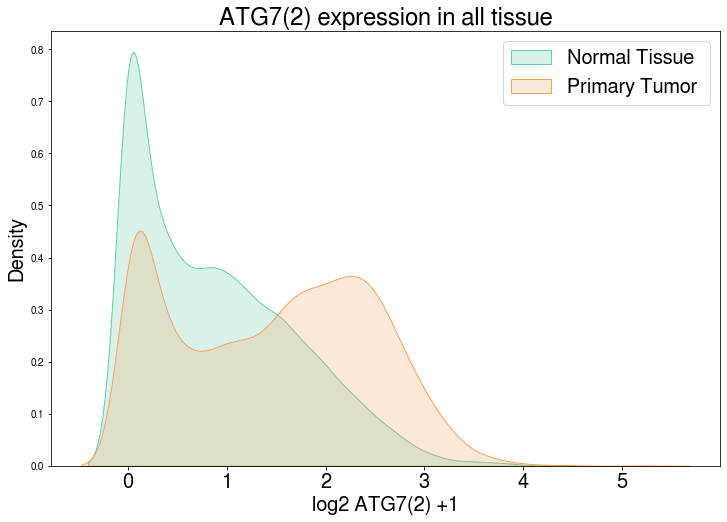

<Figure size 864x576 with 0 Axes>

In [17]:
# Distribution graph, for ATG7, iso1 & iso2

all_dfs = [[df_ATG7_Normal, 'in all tissue', df_ATG7_Primary, 'all primary tumors']]

isoforms = [['log2_+1_ATG7(total)', 'ATG7'], ['log2_+1_ATG7(1)', 'ATG7(1)'], ['log2_+1_ATG7(2)', 'ATG7(2)']]


for df in all_dfs:
  for isoform in isoforms:
    xData = df[0][isoform[0]]
    x2Data = df[2][isoform[0]]

    seaborn.kdeplot(xData, color = 'mediumaquamarine', fill = True)
    seaborn.kdeplot(x2Data, color = 'sandybrown', fill = True)

    plt.xlabel('log2 '+ isoform[1]+ ' +1')
    plt.title(isoform[1]+ ' expression ' + df[1] )
    plt.legend(labels=["Normal Tissue","Primary Tumor "])
    plt.show()
    plt.clf()

##B) Percentage do not express ATG7 isoforms

In [18]:
#Percentage of patients: 

all_dfs = [[df_ATG7_Normal, 'all normal tissue'], [df_ATG7_Primary, 'all primary tumor']]

isoforms = [['ATG7(total)', 'ATG7'], ['ATG7(1)', 'ATG7(1)'], ['ATG7(2)', 'ATG7(2)'], ['ATG7(3)', 'ATG7(3)']]

for df in all_dfs:
  print(df[1])
  for isoform in isoforms:
        
    QUOI = isoform[1]
    OU = df[1]
    all = (df[0][isoform[0]]).shape
    no_exp = (df[0][isoform[0]]<0.1).sum()
    perc_no_exp = (no_exp*100)/all
    perc_no_exp = float(perc_no_exp)

    # print("The percentage of patient who do not express", QUOI, OU, "is:", round(perc_no_exp,1),'%')
    print(round(perc_no_exp,1),'% of tumor do not express', QUOI)
  print()


all normal tissue
0.4 % of tumor do not express ATG7
0.4 % of tumor do not express ATG7(1)
24.3 % of tumor do not express ATG7(2)
59.2 % of tumor do not express ATG7(3)

all primary tumor
0.0 % of tumor do not express ATG7
0.0 % of tumor do not express ATG7(1)
13.4 % of tumor do not express ATG7(2)
33.6 % of tumor do not express ATG7(3)



## C) Expression figures

### 1) Value TPM

16614


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


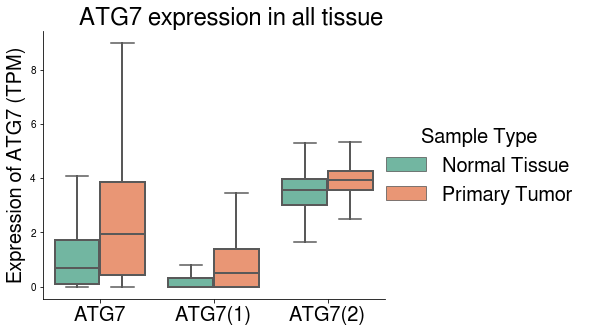

In [19]:
# Distribution: Data preparation + graph

data = [[df_Norm_Prim, 'all tissue']]

for df in data:
   
  shape = df[0].shape
  shape = shape[0]
  print(shape)

  #select the sample type column
  sample_type = {'sample_type':[df[0].iloc[:,1][i]
      for i in range(0, shape)]}

  #convert to df, and copy it 3 times
  sample_typedf = pandas.DataFrame(sample_type)
  sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf])
  sample_typedf.reset_index(drop=True, inplace=True)

  # Y for expression value 
  y = {'y':[df[0].iloc[:,j][i]
      for j in range(9,12)
        for i in range(0, shape)]}

  #create df with Y 
  data_distrib = pandas.DataFrame(y)

  # X for ATG7/iso1/iso2
  data_distrib['x'] = ''
  data_distrib['x'][: shape] = 'ATG7'
  data_distrib['x'][shape: shape*2] = 'ATG7(1)'
  data_distrib['x'][shape*2:] = 'ATG7(2)'

  # Will be used for Hue
  data_distrib['Sample Type'] = sample_typedf['sample_type']

  #graph
  seaborn.catplot(x="x", y="y", hue="Sample Type", aspect= 1.2, kind="box", palette = 'Set2', data = data_distrib, 
                  boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)
  
  plt.ylabel('Expression of ATG7 (TPM)')
  plt.xlabel('')
  plt.title('ATG7 expression in '+ df[1], x=.55)

In [20]:
#Distribution: Stats for all 

all_dfs = [[df_ATG7_Normal, 'all normal tissue', df_ATG7_Primary, 'all primary tumors']]

isoforms = ['ATG7', 'ATG7_1', 'ATG7_2']

for df in all_dfs:
  for isoform in isoforms:

    n1 = "{:.3f}".format(numpy.median(df[0][isoform]))
    n2 = "{:.3f}".format(numpy.median(df[2][isoform]))

    # Mann-Whitney analysis 
    statistic, pvalue = scipy.stats.mannwhitneyu(df[0][isoform], df[2][isoform])
    Pvalue = "{:.3E}".format(pvalue)
    print("the pvalue between", df[1]+'('+n1+')', "and", df[3]+'('+n2+')', "for", isoform, 'is', Pvalue)
  print()


the pvalue between all normal tissue(3.438) and all primary tumors(3.820) for ATG7 is 0.000E+00
the pvalue between all normal tissue(2.616) and all primary tumors(2.778) for ATG7_1 is 1.238E-108
the pvalue between all normal tissue(-0.576) and all primary tumors(0.949) for ATG7_2 is 0.000E+00



### 2) Normalized

16614


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


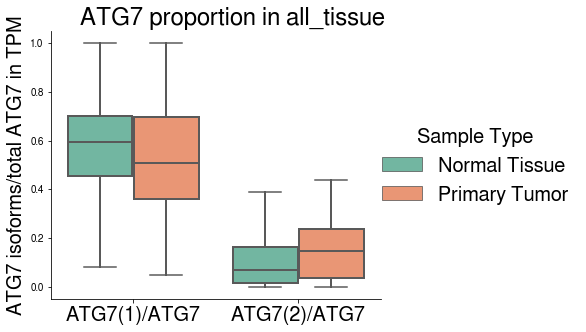

In [21]:
# NORMALiZED Distribution: Data preparation + graph

data = [[df_Norm_Prim, 'all_tissue']]


for df in data:
   
  shape = df[0].shape
  shape = shape[0]
  print(shape)

  #select the sample type column
  sample_type = {'sample_type':[df[0].iloc[:,1][i]
      for i in range(0, shape)]}

  #convert to df, and copy it 3 times
  sample_typedf = pandas.DataFrame(sample_type)
  sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf])
  sample_typedf.reset_index(drop=True, inplace=True)

  # Y for expression value 
  y = {'y':[df[0].iloc[:,j][i]
      for j in range(18,20)
        for i in range(0, shape)]}

  #create df with Y 
  data_distrib = pandas.DataFrame(y)

  # X for iso1/ATG7 and iso2/ATG7
  data_distrib['x'] = ''
  data_distrib['x'][: shape] = 'ATG7(1)/ATG7'
  data_distrib['x'][shape:] = 'ATG7(2)/ATG7'


  # Will be used for Hue
  data_distrib['Sample Type'] = sample_typedf['sample_type']

  #graph
  seaborn.catplot(x="x", y="y", hue="Sample Type", aspect= 1.2, kind="box", palette = 'Set2', data = data_distrib, 
                  boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)
  
  plt.ylabel('ATG7 isoforms/total ATG7 in TPM')
  plt.xlabel('')
  plt.title('ATG7 proportion in '+ df[1], x=0.55)


In [22]:
#NORMALIZED Distribution: Stats for all 

all_dfs = [[df_ATG7_Normal, 'all normal tissue', df_ATG7_Primary, 'all primary tumors']]

isoforms = ['ATG7(1)norm', 'ATG7(2)norm']
print('NORMALIZED')

for df in all_dfs:
  for isoform in isoforms:

    n1 = "{:.3f}".format(numpy.median(df[0][isoform]))
    n2 = "{:.3f}".format(numpy.median(df[2][isoform]))

    # Mann-Whitney analysis 
    statistic, pvalue = scipy.stats.mannwhitneyu(df[0][isoform], df[2][isoform])
    Pvalue = "{:.3E}".format(pvalue)
    print("the pvalue between", df[1]+'('+n1+')', "and", df[3]+'('+n2+')', "for", isoform, 'is', Pvalue)
  print()


NORMALIZED
the pvalue between all normal tissue(0.595) and all primary tumors(0.507) for ATG7(1)norm is 4.743E-53
the pvalue between all normal tissue(0.068) and all primary tumors(0.146) for ATG7(2)norm is 1.615E-186



#IV] Expression correlation 

##1) between the two isoforms

shape: (9185, 20)
shape after removing extrem dots: (9176, 20)
The correlation between iso1 and iso2 in normal tissue is: 0.02366015296692227 0.0414250994345116


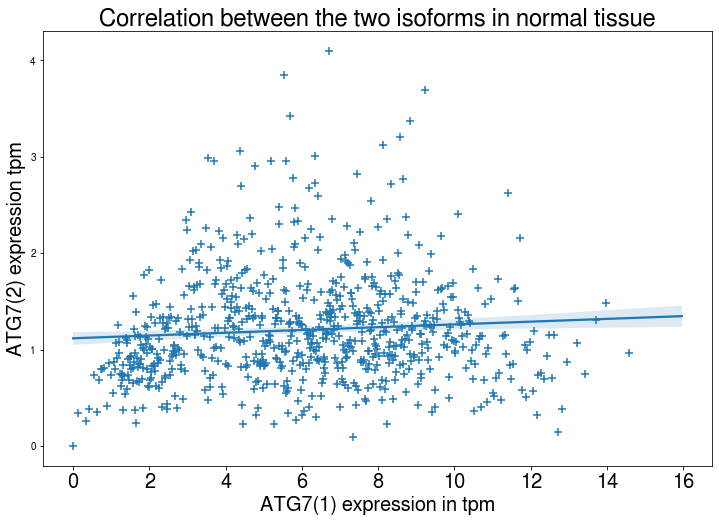


The correlation between iso1 and iso2 in primary tumors is: -0.1894636901702883 6.56308203038513e-75


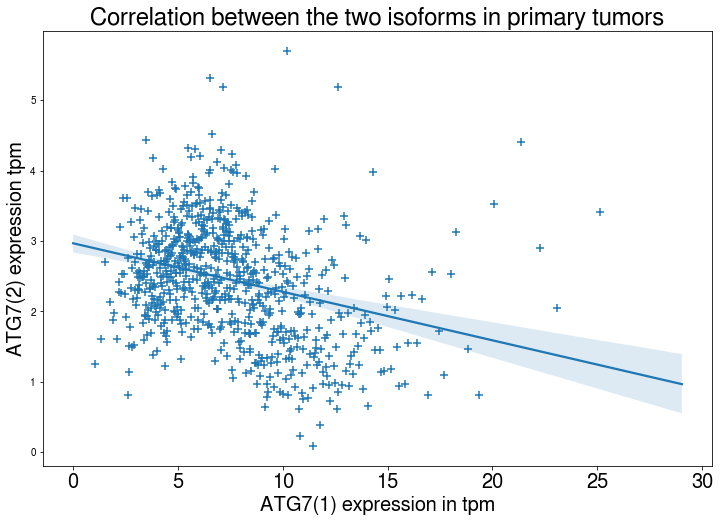

<Figure size 864x576 with 0 Axes>

In [23]:
#isoform correlation in all tissue 

#three values are very high and make my graph ugly... I remove them.
df_ATG7_Primary2 = df_ATG7_Primary[df_ATG7_Primary['ATG7(1)'] < 30 ]
print("shape:",df_ATG7_Primary.shape)
print("shape after removing extrem dots:",df_ATG7_Primary2.shape)


tissues = [[df_ATG7_Normal, "normal tissue"], [df_ATG7_Primary2, "primary tumors"]]

for tissue in tissues: 
  x = tissue[0]['ATG7(1)'].to_list()
  y = tissue[0]['ATG7(2)'].to_list()

  r_value, p_value = scipy.stats.spearmanr(x, y)
  print("The correlation between iso1 and iso2 in",tissue[1],"is:", r_value, p_value)

  seaborn.regplot(x=x,y=y, x_bins=800, x_ci = 0, marker="+")
  name = "Correlation between the two isoforms in "+  tissue[1]
  plt.title(name)
  plt.xlabel("ATG7(1) expression in tpm")
  plt.ylabel('ATG7(2) expression tpm')
  plt.show()
  plt.clf()
  print()


##1) between all protein coding

In [24]:
#to know the ensembl code for HK2
protein_coding_list.loc[protein_coding_list['hgnc_symbol'] == 'MFAP3']

,ensembl_gene_id,hgnc_symbol,entrezgene_id,transcript_biotype
19160,ENSG00000037749,MFAP3,4238.0,protein_coding


In [25]:
df_primary_expr

,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ENSG00000198888,ENSG00000198763,ENSG00000198804,ENSG00000198712,ENSG00000228253,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
0,Primary Tumor,Adrenal Gland,4.824,3.239,1.903,13.8583,14.5453,15.0736,15.2961,15.0906,...,4.7887,5.76,6.251,0.3685,4.8038,4.7955,3.4344,5.6562,0.099,5.8573
1,Primary Tumor,Adrenal Gland,4.790,4.056,1.151,12.9033,12.8996,14.2355,14.3135,14.241,...,0.7146,5.7618,5.4186,1.7489,3.7496,5.1161,1.5998,6.007,6.6291,5.8783
2,Primary Tumor,Adrenal Gland,4.764,4.570,-1.639,11.3521,11.5632,12.9722,13.4622,12.2127,...,-0.7108,5.7898,5.3618,-0.4521,5.2954,6.4777,2.4883,6.2679,3.4765,7.3056
3,Primary Tumor,Adrenal Gland,4.751,4.216,-2.727,11.6652,11.6844,13.3382,13.3893,11.279,...,-0.1665,5.813,5.9498,1.3397,4.0171,5.3646,3.2143,6.6442,-1.2142,5.3785
4,Primary Tumor,Adrenal Gland,4.600,3.060,2.783,14.3111,14.2191,15.5359,15.2714,15.5943,...,1.3051,4.3126,4.8866,-0.2845,3.7356,4.6491,2.8014,5.8488,1.8036,4.2639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9180,Primary Tumor,Eye,2.345,2.199,-9.966,14.4286,14.2979,15.2141,15.0388,14.7751,...,6.2943,4.2533,3.0515,2.8482,2.9356,4.8304,2.0004,6.0745,-0.4521,5.5299
9181,Primary Tumor,Eye,2.337,1.990,-1.283,13.7761,13.8831,14.414,14.6946,14.7479,...,9.1262,4.795,3.7006,3.9865,3.8033,4.7835,1.766,6.2024,-2.0529,5.4667
9182,Primary Tumor,Eye,2.189,1.379,-1.248,15.3308,16.0555,14.8138,16.013,16.2567,...,10.2,3.9992,3.2959,1.2394,2.7805,3.5911,1.0711,3.309,-1.7322,4.1563
9183,Primary Tumor,Eye,2.043,1.710,-9.966,13.4219,14.4282,14.403,14.9554,15.1558,...,3.6324,4.957,4.891,2.2663,3.1344,3.9194,1.5854,5.3442,-1.9379,4.892


In [26]:
# Spearman Correlation, main genes 

all_tissue_used = [[df_normal_expr,'Normal Tissue'], [df_primary_expr,'Primary Tumors']]

HK2 = 'ENSG00000159399'
YAP1 = 'ENSG00000137693'
AJUBA = 'ENSG00000129474'
YBX1 = 'ENSG00000065978'
TGFB1 = 'ENSG00000105329'
ATG7_1 = 'ATG7_1'
ATG7_2 = 'ATG7_2'
MTDH = 'ENSG00000147649'
MAPK1 = 'ENSG00000100030'
KPNA1 = 'ENSG00000114030'
TNPO1 = 'ENSG00000083312'

for tissue in all_tissue_used:
  genes_x = [[KPNA1,'KPNA1'], [MAPK1, 'MAPK1'], [TNPO1,'TNPO1'], [MTDH,'MTDH'], 
             [HK2, "HK2"], [YAP1, 'YAP1'], [AJUBA,'AJUBA'], [YBX1,'YBX1'], 
             [TGFB1,'TGFB1'], [ATG7_1,'ATG7_1'], [ATG7_2,'ATG7_2']]

  print(tissue[1])

  for gene in genes_x:
    x = tissue[0][gene[0]].to_list()
    y = tissue[0]['ATG7'].to_list()
    y1 = tissue[0]['ATG7_1'].to_list()
    y2 = tissue[0]['ATG7_2'].to_list()  
  
    r_value, p_value = scipy.stats.spearmanr(x, y)
    print('  correlation between ATG7 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
    r_value, p_value = scipy.stats.spearmanr(x, y1)
    print('  correlation between ATG7_1 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
    r_value, p_value = scipy.stats.spearmanr(x, y2)
    print('  correlation between ATG7_2 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
    print()

Normal Tissue
  correlation between ATG7 and KPNA1 is: r_value = 0.52 for a p_value of 0.00e+00
  correlation between ATG7_1 and KPNA1 is: r_value = 0.32 for a p_value of 2.82e-172
  correlation between ATG7_2 and KPNA1 is: r_value = 0.44 for a p_value of 0.00e+00

  correlation between ATG7 and MAPK1 is: r_value = 0.56 for a p_value of 0.00e+00
  correlation between ATG7_1 and MAPK1 is: r_value = 0.35 for a p_value of 3.72e-211
  correlation between ATG7_2 and MAPK1 is: r_value = 0.45 for a p_value of 0.00e+00

  correlation between ATG7 and TNPO1 is: r_value = 0.53 for a p_value of 0.00e+00
  correlation between ATG7_1 and TNPO1 is: r_value = 0.46 for a p_value of 0.00e+00
  correlation between ATG7_2 and TNPO1 is: r_value = 0.25 for a p_value of 2.74e-107

  correlation between ATG7 and MTDH is: r_value = 0.50 for a p_value of 0.00e+00
  correlation between ATG7_1 and MTDH is: r_value = 0.40 for a p_value of 2.52e-277
  correlation between ATG7_2 and MTDH is: r_value = 0.30 for a p_

In [27]:
# Spearman Correlation, all genes
all_tissue_used = [[df_normal_expr,'Normal Tissues'], [df_primary_expr,'Primary Tumors']]

isoforms = ['ATG7_1', 'ATG7_2']

all_positiv_corr_spearman = []

for tissue in all_tissue_used:
  print(tissue[1], tissue[0].shape)

  #create a new row with max() for each gene and transpose
  tissue[0].loc['max()'] = tissue[0].max()
  tissue[0] = tissue[0].T

  #select all row where max() > 2.3 (= 5 tpm)
  nb_before = tissue[0]['max()'].count()
  tissue[0] = tissue[0].drop(tissue[0].index[0:2])
  tissue[0] = tissue[0][tissue[0]['max()'] > 2.3]
  nb_after = tissue[0]['max()'].count()
  print("number of genes removed:", nb_before-nb_after)
  print('the minimum of TPM is', tissue[0]['max()'].min())
  
  #delete the column max() and tranpose back
  tissue[0] =  tissue[0].drop('max()', axis = 1) 
  tissue[0] = tissue[0].T
  print('nombre genes after removing < 4tpm', tissue[0].shape)

  for isoform in isoforms:

    genepos = []
    geneneg = []
    rvaluepos = []
    rvalueneg = []
    pvaluepos = []
    pvalueneg = []

    print(isoform)
    x = tissue[0][isoform].to_list()
    genes = tissue[0].columns[3:]

    for gene in genes:
      y = tissue[0][gene].to_list()
      r_value, p_value = scipy.stats.spearmanr(x, y)

      if r_value > 0.65:
        genepos.append(gene)
        rvaluepos.append(r_value)
        pvaluepos.append(p_value)
        
      elif r_value < -0.65:
        geneneg.append(gene)
        rvalueneg.append(r_value)
        pvalueneg.append(p_value)

    #create a dictionnary
    d = dict(ensembl_gene_id= genepos, r_value=rvaluepos,  p_value=pvaluepos)
    d2 = dict(Gene= geneneg, r_value=rvalueneg,  p_value=pvalueneg)

    #Convert to dataframe
    positiv_corr = 'pos_corr_'+tissue[1]
    negativ_corr = 'neg_corr_'+tissue[1]

    df_positiv_corr = pandas.DataFrame.from_dict(d, orient='index')
    df_negativ_corr = pandas.DataFrame.from_dict(data=d2, orient='index')

    #Transpose to have a better table
    df_positiv_corr = df_positiv_corr.transpose()
    df_negativ_corr = df_negativ_corr.transpose()

    #name
    positiv_corr = 'pos_spearman_corr_'+tissue[1]+'_'+isoform
    negativ_corr = 'neg_spearman_corr_'+tissue[1]+'_'+isoform

    print(positiv_corr, df_positiv_corr.shape)
    print(negativ_corr, df_negativ_corr.shape)

    #scending orde, save to excel
    df_positiv_corr['info'] = tissue[1]+'_'+isoform
    df_positiv_corr = protein_coding_list.merge(df_positiv_corr)
    df_positiv_corr = df_positiv_corr.drop(['entrezgene_id', 'transcript_biotype'], axis = 1)

    df_positiv_corr = df_positiv_corr.sort_values(['r_value'], ascending = False)

    df_positiv_corr.to_excel(positiv_corr+'.xlsx', index=False)
    df_negativ_corr.to_excel(negativ_corr+'.xlsx', index=False)

    all_positiv_corr_spearman.append(df_positiv_corr)
  print()

Normal Tissues (7429, 19541)


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if sys.path[0] == '':


ValueError: cannot reindex from a duplicate axis

In [28]:
tissue[0].columns

Index(['Sample_Type', 'Primary_Site', 'ATG7', 'ATG7_1', 'ATG7_2',
       'ENSG00000198888', 'ENSG00000198763', 'ENSG00000198804',
       'ENSG00000198712', 'ENSG00000228253',
       ...
       'ENSG00000160678', 'ENSG00000160679', 'ENSG00000143553',
       'ENSG00000214193', 'ENSG00000196182', 'ENSG00000181817',
       'ENSG00000116885', 'ENSG00000116898', 'ENSG00000119535',
       'ENSG00000142694'],
      dtype='object', length=19541)

In [ ]:
#Graphic representation, two graphs in one

all_tissue_used = [[df_normal_expr,'Normal Tissue', 'blue'], [df_primary_expr,'Primary Tumors', 'chocolate']]]

HK2 = 'ENSG00000159399'
YAP1 = 'ENSG00000137693'
AJUBA = 'ENSG00000129474'
YBX1 = 'ENSG00000065978'
TGFB1 = 'ENSG00000105329'
MAPK1 = 'ENSG00000100030'
MTDH = 'ENSG00000147649'
KPNA1 = 'ENSG00000114030'
TNPO1 = 'ENSG00000083312'


 
genes = [[ATG7,'ATG7'], [ATG7_1,'ATG7_1'], [MAPK1,'MAPK1'], [MTDH,'MTDH'], [KPNA1,'KPNA1'], 
         [TNPO1,'TNPO1'], [HK2,'HK2'], [YAP1,'YAP1'], [AJUBA,'AJUBA'], [YBX1,'YBX1'], [TGFB1,'TGFB1']]

for gene in genes:
  for df in data:
    
      fig, ax = plt.subplots(1,2, figsize=(18,8))
      name = gene[1]+ " correlation with the two isoforms"
      name2 = gene[1]+ " expression (log2 tpm)"

      fig.suptitle(name, fontsize="x-large")

      x = df[0][gene[0]].to_list()
      y1 = df[0]['ATG7_1'].to_list()
      y2 = df[0]['ATG7_2'].to_list()


      fig = seaborn.regplot(x=x,y=y1, ax=ax[0], x_bins=800, x_ci = 0, marker="+", label = df[1], color = df[2])
      fig.set_title("ATG7(1)")
      fig.set_xlabel(name2)
      fig.set_ylabel('ATG7(1) expression (log2 tpm)')

      fig = seaborn.regplot(x=x,y=y2, ax=ax[1], x_bins=800, x_ci = 0, marker="+", label = df[1], color = df[2])
      fig.set_title("ATG7(2)")
      fig.set_xlabel(name2)
      fig.set_ylabel('ATG7(2) expression (log2 tpm)')
      plt.legend()
      plt.show()
      plt.clf()

      print(df[1])
      r_value, p_value = scipy.stats.spearmanr(x, y1)
      print('  correlation between ATG7_1 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
      r_value, p_value = scipy.stats.spearmanr(x, y2)
      print('  correlation between ATG7_2 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
      print()